# Deterministic Diffusion Models (DDM)
> Created: May 2024 Harrison B. Prosper

## Introduction
Let $x_t \equiv x(t) \in \mathbb{R}^d$ be a $d$-dimensional variable defined on the domain $t \in [0, 1]$. Let $x_0 \sim p(x)$ be the **initial state** sampled from the probability density $p(x)$ and $x_1$ be the **terminal state**, that is, the state at the end of the trajectory that begins with $x_0$. Following the notation of [1], the path from $x_0$ to $x_1$ is the solution of the **forward stochastic differential equation** (SDE)
\begin{align}
    dx_t = \textcolor{blue}{f(t) x_t dt} + \textcolor{purple}{g(t) dW_t},
\end{align}
where $\textcolor{blue}{f(t) x_t dt}$, the **drift term**, is deteministic and $\textcolor{purple}{g(t) dW_t} = g(t) z \sqrt{dt}$ is a **stochastic term** with $z \sim {\cal N}(0, \mathbf{I}_d)$ a $d$-dimensional random variable from a diagonal $d$-dimensional standard normal. Note that because of the stochastic term, $x_t$ is also a random variable. One might be tempted to write the above equation in terms of $dx_t / dt.$ Unfortunately, the path from $x_0$ to $x_t$ is infinitely corrugated and, consequently, is nowhere differentiable!  

In [1] it is shown that if one chooses
\begin{align}
    f(t) & = \frac{d\log\alpha_t}{dt}, &\quad \alpha_t \equiv \alpha(t),\\
    g^2(t) & = \frac{d\sigma_t^2}{dt} - 2 f(t) \sigma_t^2, &\quad \sigma_t \equiv \sigma(t), 
 \end{align}
then the conditional probability density of $x_t$ is given by 
\begin{align}
p(x_t | x_0) & = {\cal N}(x_t; \alpha_t x_0, \, \sigma^2_t \mathbf{I}), \\
 & = \prod_{i=1}^d {\cal N}(x_{t, i}; \alpha_t x_{0,i}, \sigma_t^2),
\end{align}
where $x_{t, i}$ and $x_{0, i}$ are the $i^\text{th}$ components of the associated $d$-dimensional variables.
If $\alpha_t$ is chosen so that is goes to zero as $t \rightarrow 1$ and $\sigma_t$ remains finite in the same limit then the terminal state $x_1$ will be distributed according to a zero mean diagonal $d$-dimensional normal with variance $\sigma_1^2$ irrespective of the initial state $x_0$. The $d$-dimensional Gaussian is a **fixed point** of the SDE. 
Bao *et al.* [2] suggest the following choices
\begin{align}
    \alpha_t & = 1 - t, \\
    \sigma_t^2 & = t .
\end{align}
I'll use
\begin{align}
    \alpha_t & = 1 - t, \\
    \sigma_t & = t .
\end{align}
Even more remarkable than the above is the existence of a mechanism to go from $x_1$ to $x_0$.

## Reverse-Time Ordinary Differential Equation (ODE)

In [2] Feng Bao *et al.* note the striking mathematical fact that the reverse-time ODE
\begin{align}
    dx_t & = \left[f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t)\right] dt, \quad S(t, x_t) \equiv \nabla_{x_t} \log p(x_t),
\end{align}
where $p(x_t)$ is the probability density of $x_t$ and $S(x_t, t)$ is the **score funtion** associated with $p(x_t)$ can be used 
to map $x_t$ back to $x_0$ *deterministically*, starting at $t = 1$ and evolving backwards to $t = 0$.  This is remarkable! Moreover, because these $d$ equations are ordinary differential equations we can rewrite the above as
\begin{align}
    \frac{d x_t}{dt} &= G(t, x_t), \, \, \text{ where} \\
    G(t, x_t) & = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t) .
\end{align}
The key technical task in using this equation is computing the score function, 
\begin{align}
    S(t, x_t)
                & = \frac{1}{p(x_t)}\nabla_{x_t} p(x_t), \quad p(x_t) = \int_{\mathbb{R}^d}   p(x_t | x_0) \, p(x_0) \, dx_0, \nonumber\\
        & = -\frac{1}{p(x_t)}\int_{\mathbb{R}^d} \left(\frac{x_t - \alpha_t x_0}{\sigma_t^2} \right) p(x_t | x_0) \, p(x_0) \, dx_0,\nonumber\\
        & = - \frac{1}{\sigma_t^2} \left(x_t - \alpha_t \int_{\mathbb{R}^d}  x_0 \, \frac{p(x_t | x_0) \, p(x_0)}{p(x_t)} \, dx_0 \right),\\
\rightarrow \sigma_t^2 \,     S(t, x_t)        & = \alpha_t \, q(x_t) - x_t,
\end{align}
where 
\begin{align}
 q(x_t) = \int_{\mathbb{R}^d}  x_0 \, p(x_0 | x_t) \, dx_0,  
\end{align}
is the conditional expectation of the state $x_0$ at $t = 0$ given the state $x_t$ at time $t$. Following [1], $g^2(t)$ can be re-expressed as follows,
\begin{align}
    g^2(t) & = \frac{d\sigma_t^2}{dt} - 2 f(t) \sigma_t^2,\nonumber\\
    & = 2 \sigma_t \frac{d\sigma_t}{dt} - 2 \frac{d\log\alpha_t}{dt} \sigma_t^2,\nonumber\\
    & = 2 \sigma_t^2 \frac{d\log\sigma_t}{dt} - 2 \frac{d\log\alpha_t}{dt} \sigma_t^2,\nonumber\\
\rightarrow \quad    -\frac{1}{2} g^2(t) & = \sigma_t^2 \frac{d\log\alpha_t/\sigma_t}{dt}.
\end{align}
Then we can rewrite $G(t, x_t)  = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t)$ as follows
\begin{align}
 G(t, x_t) & = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t),\nonumber\\
     & = \frac{d\log\alpha_t}{dt} \, x_t +  \frac{d\log\alpha_t/\sigma_t}{dt} 
     \sigma_t^2 S(t, x_t),
     \nonumber\\
     & = \frac{d\log\alpha_t}{dt} \, x_t + \frac{d\log\alpha_t/\sigma_t}{dt} 
     (\alpha_t \, q(x_t) - x_t), 
     \nonumber\\
     & = \frac{d\log\sigma_t}{dt} \, x_t  + \alpha_t \, \frac{d\log\alpha_t/\sigma_t}{dt} 
     \, q(x_t), 
     \nonumber\\
     & = \lambda(t) \, x_t + \mu(t)
     \, q(x_t), \text{ where}
     \\ \nonumber\\
   \lambda(t) = \lambda_t  & \equiv \frac{d\log\sigma_t}{dt} \text{ and }\\
   \mu(t) = \mu_t & \equiv \alpha_t \frac{d\log\alpha_t/\sigma_t}{dt}.
\end{align}

Specializing to $\alpha_t = 1 - t$ and $\sigma_t^2 = t$, we have $\lambda(t) = (2t)^{-1}$ and $\mu(t) = -(1+t)(2t)^{-1}$ and, therefore,
\begin{align}
    \frac{dx_t}{dt} &= \lambda_t \, x_t + \mu_t \, q(x_t),\nonumber\\
    \frac{dx_t}{dt} &= G(t, x_t), \text{ where } G(t, x_t) = [ x_t  - (1 + t) \, q(x_t) ] (2t)^{-1}.
\end{align}
If we use $\alpha_t = 1 - t$ and $\sigma_t = t$, we have $\lambda(t) = t^{-1}$ and $\mu(t) = -t^{-1}$ and, therefore,
\begin{align}
    \frac{dx_t}{dt} &= \lambda_t \, x_t + \mu_t \, q(t, x_t),\nonumber\\
    \frac{dx_t}{dt} &= \frac{x_t  - q(t, x_t)}{t} \equiv G(t, x_t).
\end{align}

## Approximating $q(t, x_t)$
Bao *et al.* propose to approximate the integrals over $\mathbb{R}^d$ using Monte Carlo integration. Let's follow this very clever suggestion. Writing 
$q(t, x_t)$ as
\begin{align}
q(t, x_t) & = \int_{\mathbb{R}^d}  x_0 \, p(x_0 | x_t) \, dx_0 , \\
& =  \int_{\mathbb{R}^d}  x_0 \, \frac{p(x_t | x_0) \, p(x_0)}{p(x_t)} \, dx_0,\\
                    & = \int_{\mathbb{R}^d}  x_0 \, w(x_t, x_0) \, p(x_0) \, dx_0 ,  \quad\text{where } w(x_t, x_0) = \frac{p(x_t | x_0)}{p(x_t)},
\end{align}
we can approximate the integrals as follows, 
\begin{align}
        q(t, x_t)  & \approx \sum_{i=1}^N x_{0n} \, \hat{w}(x_t, x_{0n}), \quad\text{where } \\
                    \hat{w}(x_t, x_{0n}) & = \frac{p(x_t | x_{0n})}{\sum_{m=1}^N p(x_t | x_{0m})},
\end{align}
and $\{ x_{0n} \}, n = 1,\cdots, N$ is a sample drawn from $p(x_0)$. 

The weight $w(x_t, x_0)$ has an interesting interpretation as can be seen by writing it as follows,
\begin{align}
    w(x_t, x_0) & = \frac{p(x_t| x_0)}{p(x_t)}, \nonumber\\
    & = \frac{p(x_t| x_0) \, p(x_0)}{p(x_t) \, p(x_0)}, \nonumber\\
    & = \frac{p(x_t, x_0)}{p(x_t) \, p(x_0)}.
\end{align}
The weight measures the degree to which the variables $x_t$ and $x_0$ are statistically independent.

### References
  1. Cheng Lu†, Yuhao Zhou†, Fan Bao†, Jianfei Chen†, Chongxuan Li‡, Jun Zhu, *DPM-Solver: A Fast ODE Solver for Diffusion Probabilistic Model Sampling in Around 10 Steps*, arXiv:2206.00927v3, 13 Oct 2022.
  1. Yanfang Lui, Minglei Yang, Zezhong Zhang, Feng Bao, Yanzhao Cao, and Guannan Zhang, *Diffusion-Model-Assisted Supervised Learning of Generative Models for Density Estimation*, arXiv:2310.14458v1, 22 Oct 2023

In [1]:
import torch
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

from tqdm import tqdm

# update fonts
FONTSIZE = 12
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

# set a seed to ensure reproducibility
seed = 42
rnd  = np.random.RandomState(seed)

### Generate Data
Our goal is to sample from a spiral by sampling from a bi-variate normal (Gaussian).

(40000, 2)


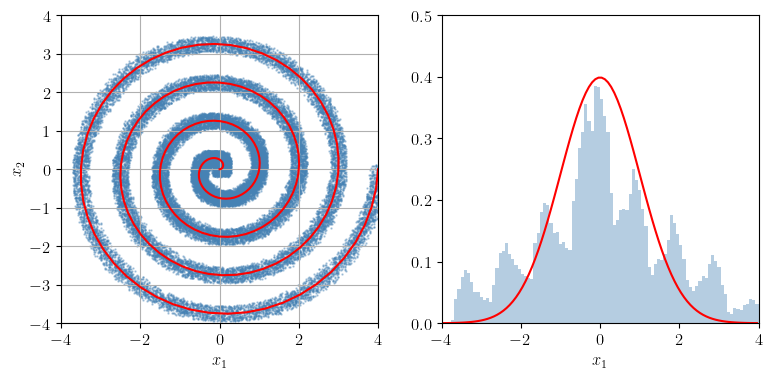

In [2]:
RMIN, RMAX = 0, 4

# rmin, rmax: radial range
# amin, amax: angular range

def spiral(rmin=RMIN, rmax=RMAX, amin=0, amax=8*np.pi, size=200):
    PHI = np.linspace(amin, amax, size)
    R = np.linspace(rmin, rmax, size)
    x = []
    y = []
    for r, phi in zip(R, PHI):
        x.append(r*np.cos(phi))
        y.append(r*np.sin(phi))
    return x, y

def rnorm2d(size=2000):
    x = np.random.normal(loc=0, scale=1, size=size)
    y = np.random.normal(loc=0, scale=1, size=size)
    return x, y

def rspiral(rmin=RMIN, rmax=RMAX, amin=0, amax=8*np.pi, d=RMAX/20, size=40000):
    u  = np.random.uniform(0, 1, size)
    r  = rmin + u * rmax
    phi= amin + u * amax

    X = r*np.cos(phi)
    Y = r*np.sin(phi)
    x = np.random.uniform(X-d, X+d)
    y = np.random.uniform(Y-d, Y+d)

    d = np.stack([x, y], axis=1)
    np.random.shuffle(d)
    return d
    
def plotfig(d, f=None, xmin=-RMAX, xmax=RMAX, ymin=-RMAX, ymax=RMAX,
            filename='fig_spiral.png'):

    x1, x2 = d[:, 0], d[:, 1]
    
    fig = plt.figure(figsize=(9, 4))
    fig.tight_layout()
    
    ax  = fig.add_subplot(1, 2, 1)
    
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$x_1$')
    
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$x_2$')
    
    ax.scatter(x1, x2, s=0.5, color='steelblue', alpha=0.4)

    if f:
        x, y = f()
        ax.plot(x, y, color='red')

    ax.grid('both')

    ax2  = fig.add_subplot(1, 2, 2)
    ax2.set_xlim(xmin, xmax)
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylim(0, 0.5)
    
    c, x, _ = ax2.hist(x1, range=(xmin, xmax), bins=100, density=True, 
                       color='steelblue', alpha=0.4)
    x = (x[1:]+x[:-1])/2
    h = x[1]-x[0]
    y = st.norm.pdf(x)
    ax2.plot(x, y, color='red')
    
    if filename:
        plt.savefig(filename)
        
    plt.show()

x0 = rspiral()
print(x0.shape)
plotfig(x0, spiral)

### Reverse ODE

Specializing to $\alpha_t = 1 - t$ and $\sigma_t = t$, we have $\lambda(t) = t^{-1}$ and $\mu(t) = -t^{-1}$ and, therefore,
\begin{align}
    \frac{dx_t}{dt} &= \lambda_t \, x_t + \mu_t \, q(t, x_t),\nonumber\\
    \frac{dx_t}{dt} &= [ x_t  - q(t, x_t) ] t^{-1} \equiv G(t, x_t),
\end{align}
and
$q(t, x_t)$ is given by
\begin{align}
q(t, x_t) & = \int_{\mathbb{R}^d}  x_0 \, p(x_0 | x_t) \, dx_0 , \\
& =  \int_{\mathbb{R}^d}  x_0 \, \frac{p(x_t | x_0) \, p(x_0)}{p(x_t)} \, dx_0,\\
                    & = \int_{\mathbb{R}^d}  x_0 \, w(x_t, x_0) \, p(x_0) \, dx_0 ,  \quad\text{where } w(x_t, x_0) = \frac{p(x_t | x_0)}{p(x_t)}, \text{ and } \\
p(x_t | x_0)
 & = \prod_{i=1}^d {\cal N}(x_{t, i}; \alpha_t x_{0,i}, \sigma_t^2), \\
 & \propto \exp\left( -\frac{1}{2\sigma_t^2}\sum_{i=1}^d (x_{t, i} - \alpha_t x_{0,i})^2 \right) .
\end{align}
We can approximate the integrals as follows, 
\begin{align}
        q(x_t)  & \approx \sum_{i=1}^N x_{0n} \, \hat{w}(x_t, x_{0n}), \quad\text{where } \\
                    \hat{w}(x_t, x_{0n}) & = \frac{p(x_t | x_{0n})}{\sum_{m=1}^N p(x_t | x_{0m})},
\end{align}
and $\{ x_{0n} \}, n = 1,\cdots, N$ is a sample drawn from $p(x_0)$. 

Given
\begin{align}
    x^\prime & = G(t, x),
\end{align}
then
\begin{align}
    x(t - h) & = x(t) - x^\prime h + \frac{x^{\prime\prime}}{2!} h^2 - {\cal O}(h^3), \nonumber\\
    & = x(t) - G(t, x) h + \frac{x^{\prime\prime}}{2!} h^2 - {\cal O}(h^3),
\end{align}
and
\begin{align}
x(t + h) & = x(t) + G(t, x) h + \frac{x^{\prime\prime}}{2!} h^2 + {\cal O}(h^3).
\end{align}
Subtracting the second equation from the first yields,
\begin{align}
x(t-h) & =  - 2 G(t, x(t)) h + x(t + h) + {\cal O}(h^3), \text{ that is, }\\
x(t-2h) & =  - 2 G(t-h, \, x(t-h)) h + x(t) + {\cal O}(h^3) .
\end{align}
The starting equation is
\begin{align}
    x(1-2h) & = - 2 G(1 - h, \, x(1-h)) h + x(1) + {\cal O}(h^3) ,
\end{align}
which requires an approximation for $x(1 - h)$ the simplest being $x(1 - h) = x(1) - G(1, x(1)) h + {\cal O}(h^2) $.

In [5]:
class ReverseODE:    
    '''
    Given a terminal Gaussian state X at t=1 compute the original 
    state Y at t=0.

    X must be of shape (B, d) where B is the batch size for approximating 
    the score and d is the number of dimensions. 
    
    1. Use method rnormal(x0) to create array X with the same shape as 
    array x0 whose elements are sampled from the desired probability 
    density p(x0), modeled using a simulator. 

    2. Use method batch(x0, size=B) to sample a batch of points from x0 to
    be used to create a Monte Carlo approximation of the score function of
    p(x0).

    Example
    -------
    rODE = ReverseODE()
        :   :

    X = rODE.rnormal(x0)
    M = len(X)

    B = 5000
    x0_B = rODE.batch(x0, size=B)

    Y = []
    for i in tqdm(range(M)):
        Y.append(rODE(X[i], B))
    Y = np.array(Y)
   
    '''
    def __init__(self, use_ML=False, which=2):
        
        self.model = None
        self.use_ML= use_ML
        self.which = which

        self.t  = []
        self.q1 = []
        self.q2 = []
        self.x1 = []
        self.x2 = []
        
        if self.use_ML:
            import qnet as NN
            importlib.reload(NN)
            
            self.model = NN.Net()
            modelfile = '%s.dict' % NN.name
            print(modelfile)            
            modeldict = torch.load(modelfile)
            self.model.load_state_dict(modeldict)
        
    def rnormal(self, x_0):
        # get terminal state
        means  = np.zeros_like(x_0)
        scales = np.ones_like(x_0)
        return np.random.normal(loc=means, scale=scales)

    def runiform(self, x_0, xmin, xmax):
        # get terminal state
        return np.random.uniform(xmin, xmax,
                                 len(x_0.flatten())).reshape(x_0.shape)
        
    def batch(self, x_0, size=4000):
        ii = np.random.randint(0, len(x_0)-1, size)
        B  = x_0[ii]
        return B

    def alpha(self, t):
        return 1 - t
    
    def sigmasquared(self, t):
        return t if self.which==1 else t**2

    def sigma(self, t):
        return np.sqrt(t) if self.which==1 else t

    def f(self, t):
        return -1 / (1 - t)

    def g(self, t):
        return np.sqrt((1+t)/(1-t)) if self.which == 1 else np.sqrt(4*t/(1-t)) 

    def lm(self, t):
        return 1/2/t if self.which == 1 else 1/t

    def mu(self, t):
        return -(1+t)/2/t if self.which == 1 else -1/t
        
    def q(self, t, x_t, x_0, debug=False):
            
        if len(x_t.shape) == 1:
            x_t = x_t[np.newaxis,...]
            
        # x_t.shape: (1, d)   d number of dimensions
        # x_0.shape: (B, d) B batch size
        if debug:
            print('x_t.shape', x_t.shape, 'x_0.shape', x_0.shape)
        
        sigma2_t= self.sigmasquared(t)
        alpha_t = self.alpha(t)

        # change shape of x_t to (1, d) so that it is compatible with the 
        # shape (B, d) of x_0 
        z_t = x_t - alpha_t * x_0
        # z_t.shape: (B, d)
        if debug:
            print('z_t.shape', z_t.shape)

        # sum over arguments of exponential, that is, over the d-dimensions
        # of each batch element in x_0, so that we get the product of d normal 
        # densities for each of the B elements in x_0.
        zz  = z_t**2 / sigma2_t
        zz  = zz.sum(axis=1)
        p_t = np.exp(-zz/2)
        # p_t.shape: (B, )
        if debug:
            print('p_t.shape', p_t.shape)
        
        # compute weight by dividing by the sum over the B Gaussian densities
        p_t_sum = p_t.sum()
        if p_t_sum == 0:
            return None
            
        w_t = p_t / p_t_sum
        # w_t.shape: (B,)
        if debug:
            print('w_t.shape', w_t.shape)
        
        # sum over the batch of B weighted elements of the input state.
        # this amounts to summing over the first axis of the array x_0.
        x_0_w_t = x_0 * w_t[:, np.newaxis]
        if debug:
            print('x_0_w_t.shape', x_0_w_t.shape)
        
        q_t = x_0_w_t.sum(axis=0)
        if debug:
            print('q_t.shape', q_t.shape)
        
        return q_t

    def score(self, t, x_t, x_0):
        q_t = self.q(t, x_t, x_0)
        
        # x_t and q_t are of the same shape.
        # finish calculation of the score
        s_t = -(x_t - self.alpha(t) * q_t)/ self.sigmasquared(t)
        return s_t

    def G(self, t, x_t, x_0):
        if self.use_ML:
            q_t = self.q_ML(t, x_t, x_0)
        else:
            q_t = self.q(t, x_t, x_0)
            
        return self.lm(t) * x_t + self.mu(t) * q_t
        
    def __call__(self, x_1, x_0, T=400, savepath=False):

        dt = 1/T
        t  = 1
        
        if savepath:
            y = [x_1]

        # finite difference equations
        # x(t-h) = x(t + h) - 2 G(x(t), t) h + O(h^3).
        #
        # define:
        #   x_t_0 = x(t+h)
        #   x_t_1 = x(t)
        #   x_t_2 = x(t-h)
        #
        # therefore,
        #   x_t_2 = x_t_0 - 2 * G(t, x_t_1) * h

        x_t_0 = x_1
        G_t = self.G(t, x_t_0, x_0)
        x_t_1 = x_t_0 - G_t * dt
        
        if savepath:
            y.append(x_t_1)
            
        for i in range(T-2):
            
            t = 1 - (i+1)*dt
            #if t <= 0: break

            G1 = self.G(t, x_t_1, x_0)
            x_t_2 = x_t_0 - 2 * G1 * dt

            if savepath:
                y.append(x_t_2)

            # recurse
            x_t_0 = x_t_1
            x_t_1 = x_t_2

        # extrapolate to t = 0
        #x_t_2 = 2*x_t_1 - x_t_0
        #if savepath:
        #    y.append(x_t_2)
            
        if savepath:
            return np.array(y)
        else:
            return x_t_2

### Compute flows from Gaussian noise, $x_1 \sim \mathcal{N}(x_1)$, to the desired distribution, $x_0 \sim p(x_0)$

Computing 40,000 flow lines sequentially takes about 25 minutes on a modern MacBook Air. In practice, the flow lines would be computing in parallel.

100%|█████████████████████████████████████| 40000/40000 [26:58<00:00, 24.72it/s]


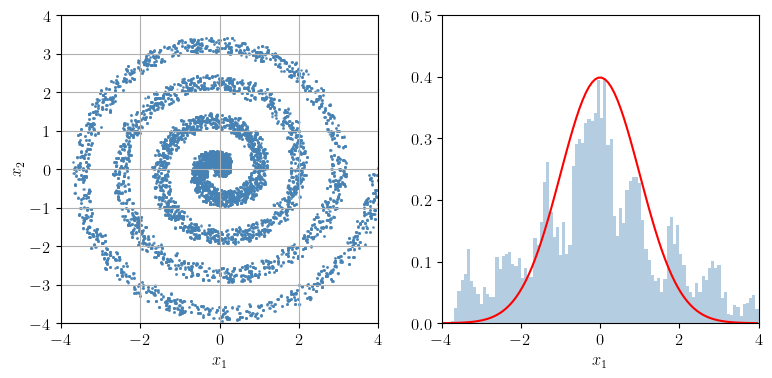

In [6]:
rODE = ReverseODE()

M = len(x0)
X = rODE.rnormal(x0)  # sample Gaussian noise
B = rODE.batch(x0)    # get a batch from the target distributioin (this would come from a simulation)

Y = []
for i in tqdm(range(M)):
    Y.append(rODE(X[i], B, savepath=True))
    
Y = np.array(Y)
plotfig(Y[:,-1,:])